In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df_raw = pd.read_excel("./dataset/linkedin_raw.xlsx", na_values='NaN')

In [4]:
df_raw.tail()

,index,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,...,linkedinPreviousJobTitle,linkedinPreviousJobDateRange,linkedinPreviousJobLocation,linkedinSchoolName,linkedinSchoolDegree,linkedinSchoolDateRange,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20
1434,1444,NaN,ONY PUTRA EKA BAGASKARA,S1 Desain Komunikasi Visual,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1435,1445,https://www.linkedin.com/in/tiara-azzani/,TIARA MARSHA FAUZIAH SAAZARI,S1 Desain Komunikasi Visual,Dinas Komunikasi dan Informatika,Social Media Intern,Jun 2022 - Present,"West Java, Indonesia",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2019-2023,NaN,NaN,NaN,NaN
1436,1446,https://www.linkedin.com/in/twulan20/?locale=e...,TRI WULANDARI,S1 Desain Komunikasi Visual,Condfe,Producer,Jun 2023 - Present,"Jakarta, Indonesia",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018-2022,NaN,NaN,NaN,NaN
1437,1447,https://www.linkedin.com/in/farsya-billah-49b9...,SAYYID AHMAD FARSYABILLAH,S1 Ilmu Komunikasi,Orbit360,Business Development Executive,Nov 2022 - Present,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2018-2022,NaN,NaN,NaN,NaN
1438,1448,NaN,RACHMA AYU NADIA,S1 Ilmu Komunikasi,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_raw.isna()

,index,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,...,linkedinPreviousJobTitle,linkedinPreviousJobDateRange,linkedinPreviousJobLocation,linkedinSchoolName,linkedinSchoolDegree,linkedinSchoolDateRange,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,False,True,False,False,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1435,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,False,True,True,True,True
1436,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,False,True,True,True,True
1437,False,False,False,False,False,False,False,True,True,True,...,True,True,True,True,True,False,True,True,True,True


In [6]:
## Label punya/tidak punya linkedin
df_raw['label_linkedin'] = df_raw['linkedinProfileUrl'].apply(lambda x: 'punya linkedin' if pd.notna(x) else 'tidak punya linkedin')

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1439 entries, 0 to 1438
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   index                            1439 non-null   int64 
 1   linkedinProfileUrl               1048 non-null   object
 2   fullName                         1439 non-null   object
 3   Jurusan                          1438 non-null   object
 4   companyName                      675 non-null    object
 5   linkedinJobTitle                 654 non-null    object
 6   linkedinJobDateRange             668 non-null    object
 7   linkedinJobLocation              586 non-null    object
 8   location                         756 non-null    object
 9   linkedinSkillsLabel              646 non-null    object
 10  previousCompanyName              523 non-null    object
 11  linkedinPreviousJobTitle         502 non-null    object
 12  linkedinPreviousJobDateRange     5

In [8]:
df_raw['linkedinSchoolDegree'] = df_raw['linkedinSchoolDegree'].astype(str)
df_raw['Jurusan'] = df_raw['Jurusan'].astype(str)
df_raw['linkedinJobTitle'] = df_raw['linkedinJobTitle'].astype(str)

In [9]:
df_raw.isna()

,index,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,...,linkedinPreviousJobDateRange,linkedinPreviousJobLocation,linkedinSchoolName,linkedinSchoolDegree,linkedinSchoolDateRange,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20,label_linkedin
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,False,True,False,False,True,False,True,True,True,True,...,True,True,True,False,True,True,True,True,True,False
1435,False,False,False,False,False,False,False,False,True,True,...,True,True,True,False,False,True,True,True,True,False
1436,False,False,False,False,False,False,False,False,True,True,...,True,True,True,False,False,True,True,True,True,False
1437,False,False,False,False,False,False,False,True,True,True,...,True,True,True,False,False,True,True,True,True,False


In [10]:
label_linkedin_counts = df_raw['label_linkedin'].value_counts()

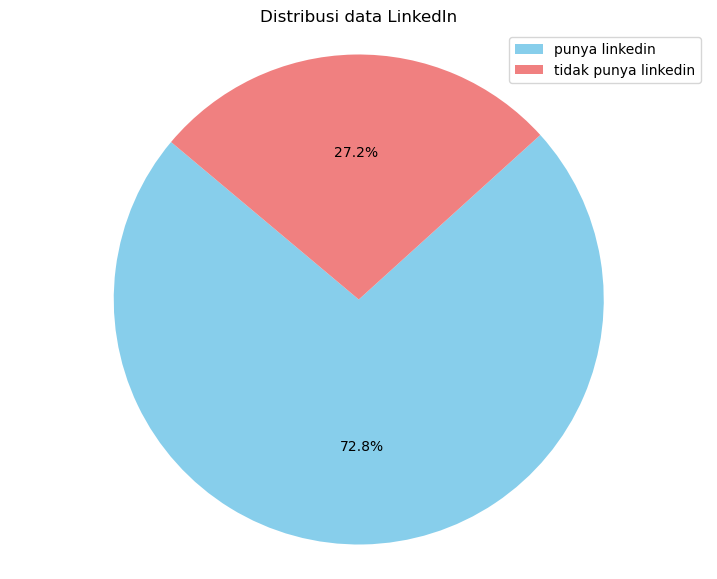

In [11]:
plt.figure(figsize=(9, 7))
plt.pie(label_linkedin_counts,  autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.axis('equal')  # Membuat lingkaran pie menjadi lingkaran sempurna
plt.title("Distribusi data LinkedIn")
plt.legend(label_linkedin_counts.index)
plt.show()

In [17]:
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

In [24]:
# Function to categorize the values
def categorize_jurusan(row):
    if 'S1' in row:
        return 'S1'
    elif 'S2' in row:
        return 'S2'
    elif 'D3' in row:
        return 'D3'
    elif 'D4' in row:
        return 'D4'
    else:
        return 'Other'

# Create a new column 'kategori_jurusan' based on categorization
df_raw['kategori_jurusan'] = df_raw['Jurusan'].apply(categorize_jurusan)

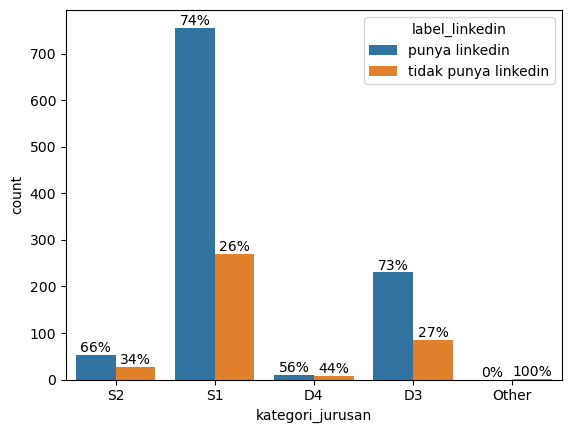

In [25]:
import seaborn as sns
ax = sns.countplot(x='kategori_jurusan', hue='label_linkedin', data=df_raw)
barPerc(df_raw,'kategori_jurusan',ax)

In [21]:
df_raw[df_raw['kategori_jurusan'] == 'other']

,index,linkedinProfileUrl,fullName,Jurusan,companyName,linkedinJobTitle,linkedinJobDateRange,linkedinJobLocation,location,linkedinSkillsLabel,...,linkedinPreviousJobLocation,linkedinSchoolName,linkedinSchoolDegree,linkedinSchoolDateRange,linkedinPreviousSchoolName,linkedinPreviousSchoolDegree,linkedinPreviousSchoolDateRange,Unnamed: 20,label_linkedin,kategori_jurusan
